In [97]:
from jax_solver import harmonic_solution
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
from jax_solver import Pt_GS_Solver, get_accuracy

In [98]:
jax.config.update("jax_enable_x64", True)

In [99]:
grid_size = 224

In [100]:
x = jnp.linspace(0, 1, grid_size)

grid = jnp.stack(jnp.meshgrid(x, x, indexing='ij'))

center = jnp.array([0.5, 0.5])
radius = 0.25

In [101]:
u_exact = harmonic_solution(grid[0], grid[1], center, radius)

In [102]:
solver = Pt_GS_Solver(num_pts=grid_size, boundary_list=jnp.array([[0.5, 0.5, 0.25]]))

In [103]:
u_exact = u_exact.at[solver.inner_boundary].set(1.0)
u_sim = solver.solve(u_exact[solver.whole_boundary],max_iter=10000,w=1.5)[0]

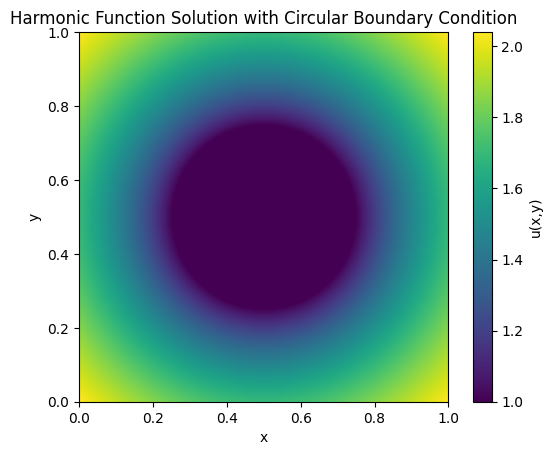

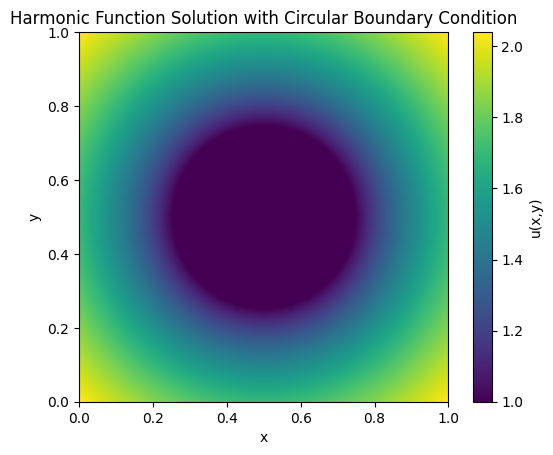

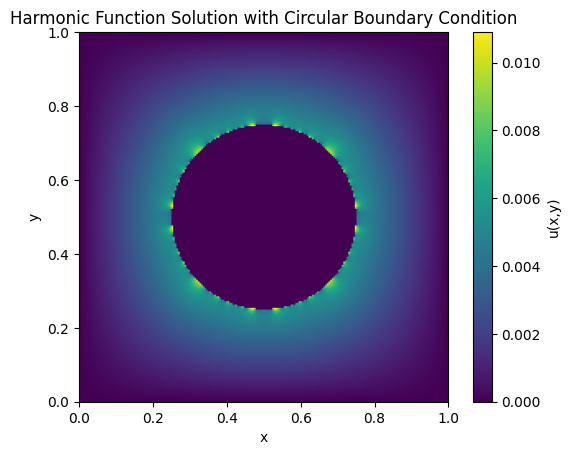

In [104]:
plt.imshow(u_exact, extent=(0, 1, 0, 1), origin='lower')
plt.colorbar(label='u(x,y)')
plt.title('Harmonic Function Solution with Circular Boundary Condition')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
plt.imshow(u_sim, extent=(0, 1, 0, 1), origin='lower')
plt.colorbar(label='u(x,y)')
plt.title('Harmonic Function Solution with Circular Boundary Condition')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
plt.imshow(jnp.abs(u_exact-u_sim), extent=(0, 1, 0, 1), origin='lower')
plt.colorbar(label='u(x,y)')
plt.title('Harmonic Function Solution with Circular Boundary Condition')
plt.xlabel('x')
plt.ylabel('y')
plt.show()